# Clustering metrics

Clustering is a fundamental technique in unsupervised machine learning that involves grouping similar data points together to uncover underlying patterns or structures in a dataset. To evaluate the performance and quality of clustering algorithms, various metrics are employed to assess how well the algorithm has grouped the data.
Among the key clustering metrics, **Silhouette Score**, **Davies-Bouldin Index**, **Calinski-Harabasz Index**, and **Adjusted Rand Index (ARI)** stand out as widely used measures. Each of these metrics offers a unique perspective on the effectiveness of the clustering algorithms

Notably, the information on these metrics and their applications was particularly helpful, and a **[great book](https://t.me/HandsOnMachineLearning/2)** on machine learning provided valuable input.

### Silhouette Score

The Silhouette Score is a metric used to calculate the goodness of a clustering technique for a given dataset. It measures how well-defined the clusters in the data are. The score is based on both the average distance between data points within the same cluster (cohesion) and the average distance between different clusters (separation).

The Silhouette Score for the *i*-th data point, denoted as *s(i)*, is given by:

$$ S(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}$$

- *a(i)*: The average distance from the ith data point to the other data points in the same cluster. It represents cohesion.
- *b(i)*: The average distance from the ith data point to the data points in the nearest cluster (i.e., the cluster that the data point is not a part of). It represents separation.

The overall Silhouette Score for the entire dataset is usually computed as the average of the *S(i)* values for all data points

$$\text{Silhouette Score} = \frac{1}{n} \sum_{i=1}^{n}S(i)$$


- *n*: The number of data points in the dataset.
- *S(i)*: The Silhouette Score for the ith data point.



Range of Values:

   - **-1:** indicates that the data point has been assigned to the wrong cluster. It implies that the data point is better matched to the neighboring clusters than to its own cluster. This scenario suggests a poor clustering result with substantial overlap between clusters.
   - **0:** indicates that the data point is on the boundary between two clusters. It means that the average distance to points in its own cluster is comparable to the average distance to points in the nearest cluster. This situation suggests overlapping or unclear cluster boundaries
   - **1:** indicates that the data point is we-l matched to its own cluster and poorly matched to neighboring clusters. This is an ideal scenario, suggesting distinct, well-defined clusters with clear boundaries.



#### Calculating Silhouette Score in Python

The Silhouette Score in Python can be computed using the `scikit-learn` library

The code below generates a synthetic dataset with 300 data points distributed among three clusters using the `make_blobs` function. It then applies the KMeans clustering algorithm with three clusters (`k=3`) to the data. The script visualizes the original data and the clustering result with centroids using Matplotlib. Finally, it calculates and prints the silhouette score, a metric that quantifies the quality of the clustering, with a higher score indicating better-defined clusters. In this specific example, **the silhouette score for three clusters is approximately 0.85**, suggesting that the data is well-clustered.

In [234]:
import warnings
warnings.filterwarnings('ignore')

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.561464362648773
For n_clusters = 6 The average silhouette_score is : 0.4857596147013469


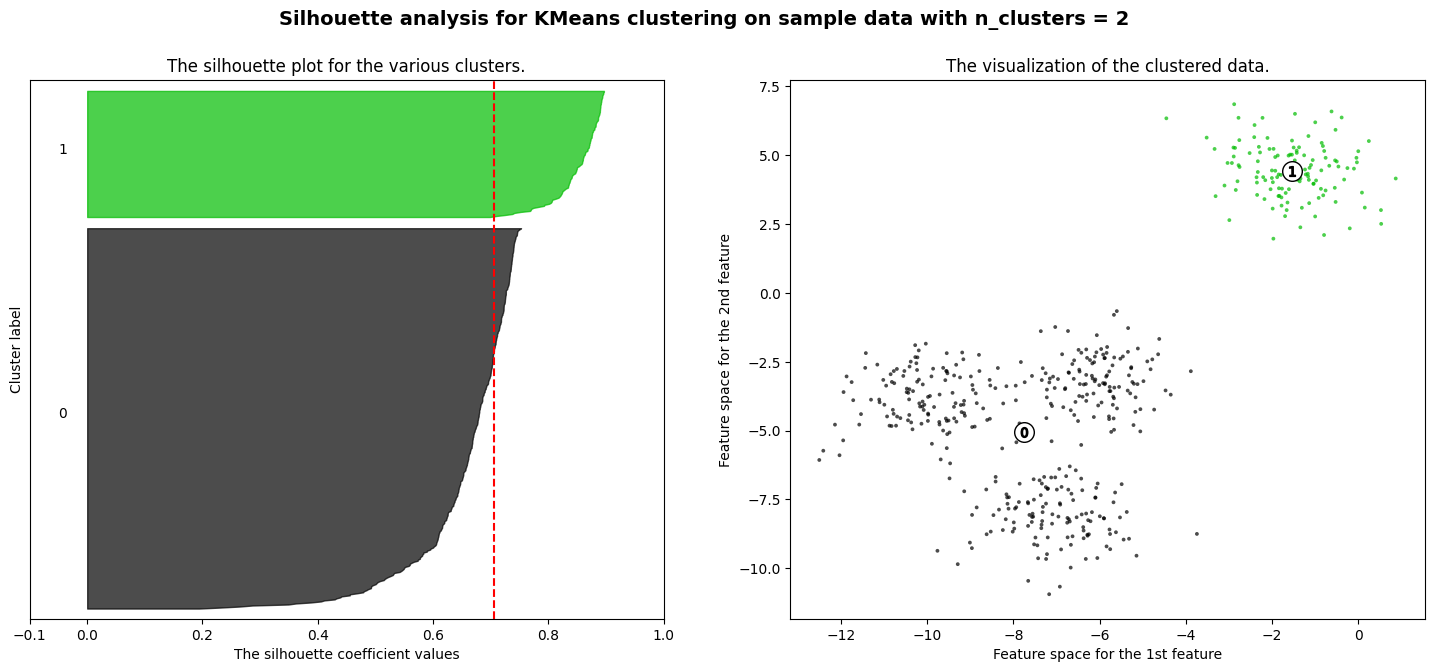

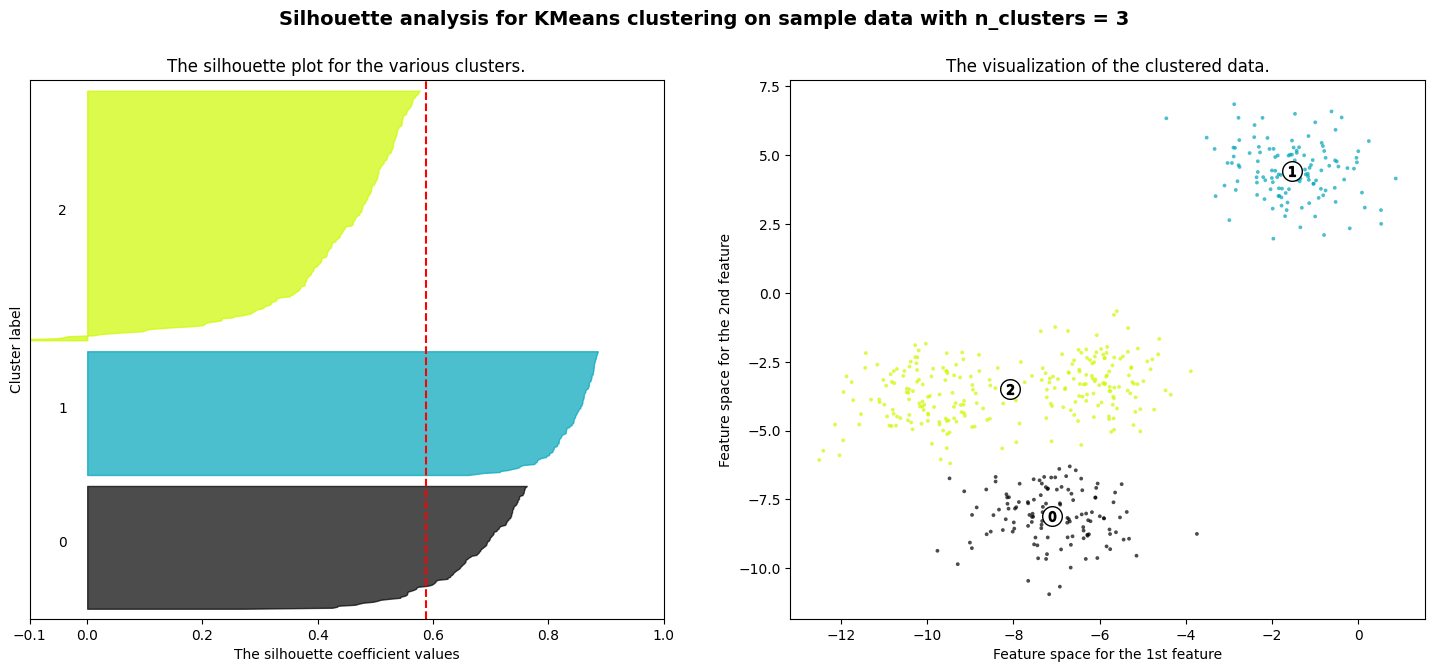

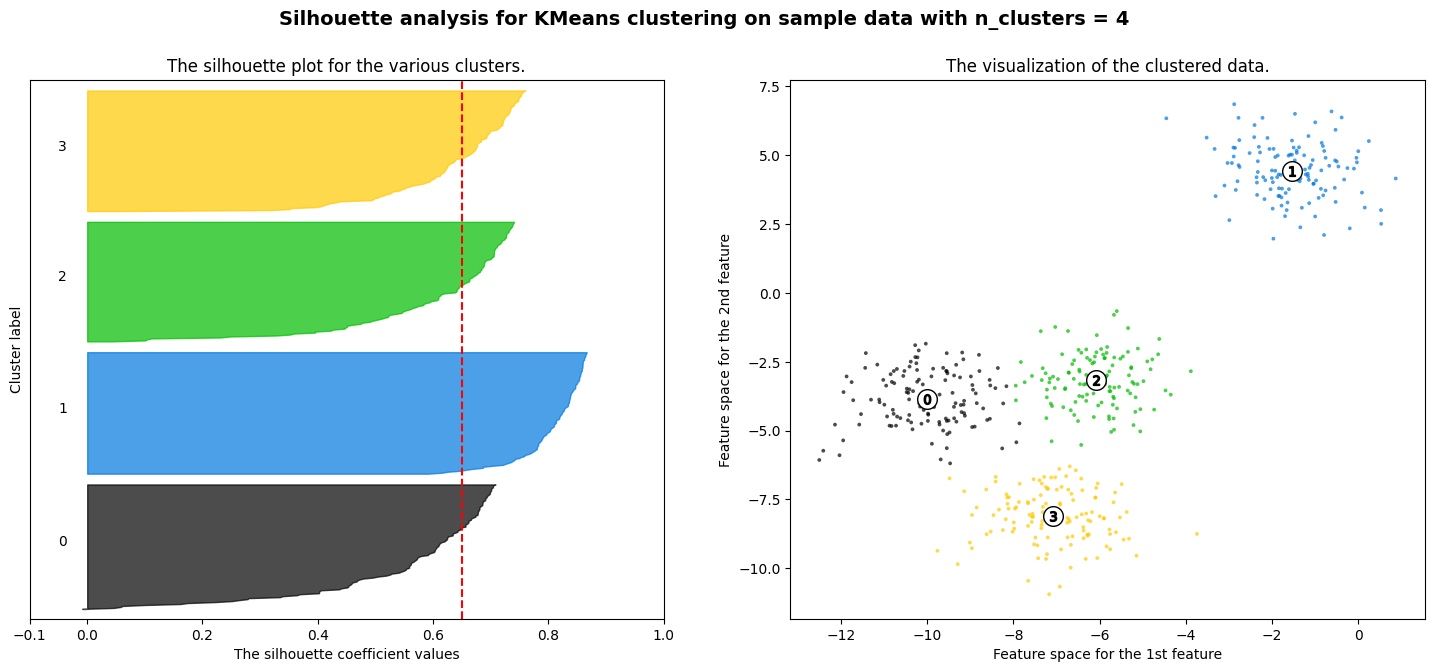

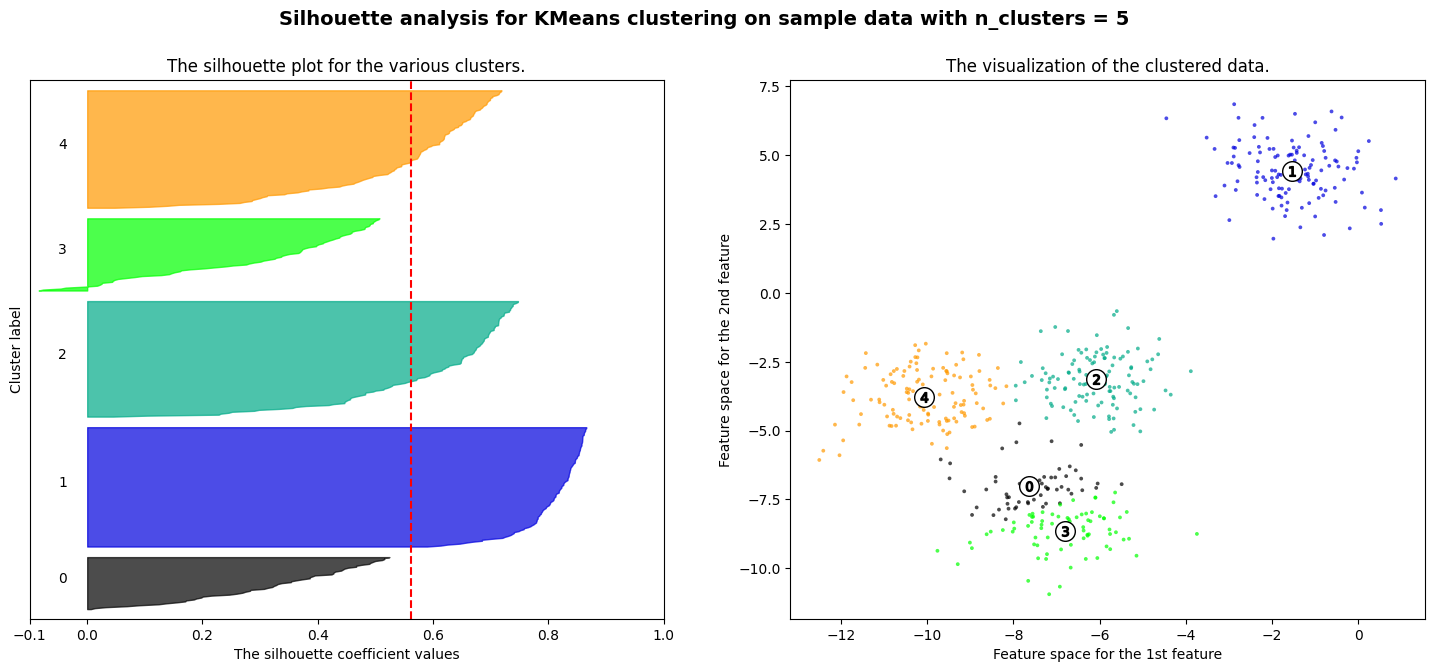

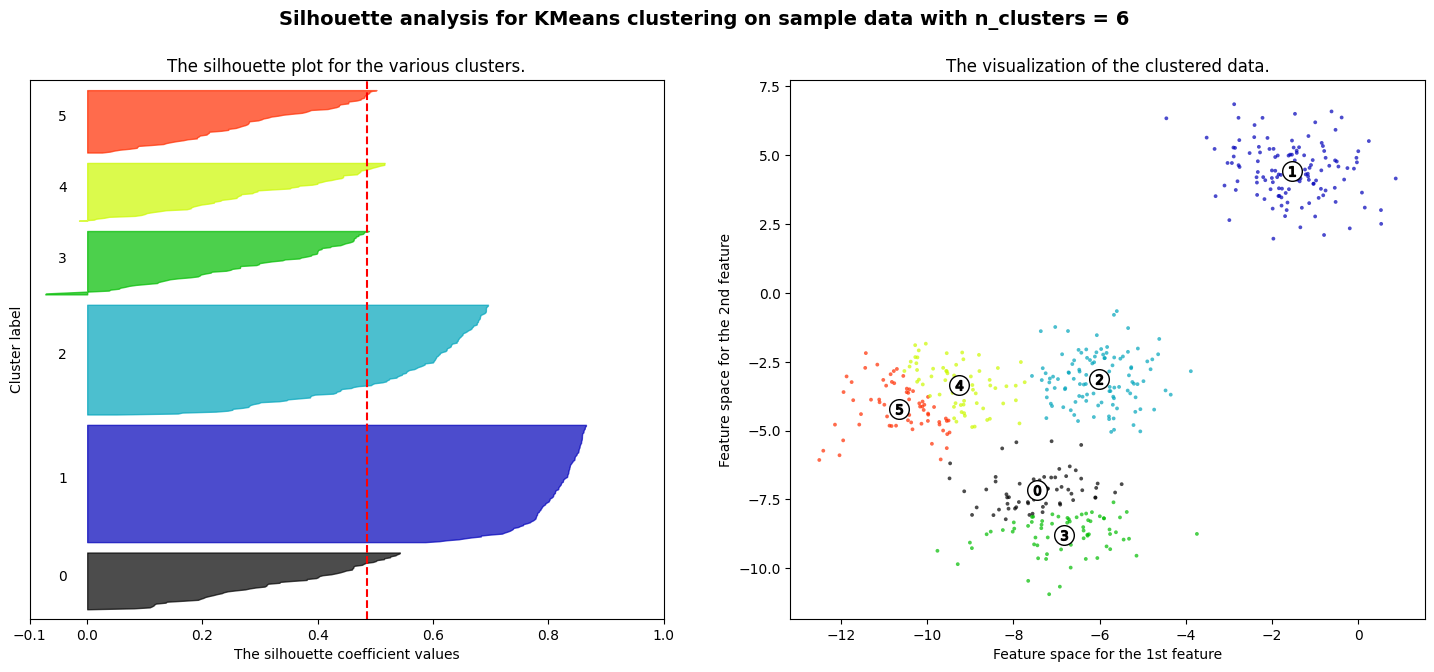

In [235]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from jupyterquiz import display_quiz

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [236]:
from IPython.display import display, HTML

# Specify the URL of your GIF
gif_url = 'https://github.com/Azamat002/clustering-metrics/blob/master/silho_dem.gif?raw=true'

# Embed the GIF in the notebook
display(HTML(f'<img src="{gif_url}">'))


```{admonition} Exercise
You are provided with a simple dataset consisting of two data points and their cluster assignments. Your task is to calculate the Silhouette Score for each data point. The Silhouette Score measures how similar a data point is to its own cluster compared to other clusters.

##### Data
* Data point 1: [1, 2] (Cluster 1) <br>
* Data point 2: [4, 5] (Cluster 2) <br>
##### Cluster Assignment
* Data point 1 is assigned to Cluster 1 <br>
* Data point 2 is assigned to Cluster 2 <br>
```
:::{note}
You can check your answer or see the explanation below
:::


<div style="display:none" id="q_silh_calc">W3sicXVlc3Rpb24iOiAiWW91ciByZXNwb25zZSBmb3IgVGFzayBBIiwgInR5cGUiOiAibnVtZXJpYyIsICJhbnN3ZXJzIjogW3sidHlwZSI6ICJ2YWx1ZSIsICJ2YWx1ZSI6IDAsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkV4Y2VsbGVudCEgWW91IGNvcnJlY3RseSBjYWxjdWxhdGVkIHRoZSBTaWxob3VldHRlIFNjb3JlLiBXZWxsIGRvbmUhIn0sIHsidHlwZSI6ICJkZWZhdWx0IiwgImZlZWRiYWNrIjogIk9vcHMhIERvdWJsZS1jaGVjayB0aGUgU2lsaG91ZXR0ZSBTY29yZSBmb3JtdWxhIGFuZCB0cnkgYWdhaW4uIn1dfV0=</div>

In [237]:
display_quiz("#q_silh_calc")

<IPython.core.display.Javascript object>

```{admonition} Explanation!
:class: tip, dropdown

#### Step 1: Calculate average distance \(a\) for each data point
$ a_1 = \frac{d([1, 2], [4, 5])}{1} $ <br>
$ a_1 = \sqrt{(1-4)^2 + (2-5)^2} = \sqrt{18} $ <br>
$ a_1 = 3\sqrt{2} $ <br>
$ a_2 = \frac{d([4, 5], [1, 2])}{1} $ <br>
$ a_2 = \sqrt{(4-1)^2 + (5-2)^2} = \sqrt{18} $ <br>
$ a_2 = 3\sqrt{2} $ <br>

#### Step 2: Calculate average distance \(b\) for each data point
$ b_1 = \min (\frac{d([1, 2], [4, 5])}{1}) $ <br>
$ b_1 = \sqrt{(1-4)^2 + (2-5)^2} = \sqrt{18} $ <br>
$ b_1 = 3\sqrt{2} $ <br>
$ b_2 = \min (\frac{d([4, 5], [1, 2])}{1}) $ <br>
$ b_2 = \sqrt{(4-1)^2 + (5-2)^2} = \sqrt{18}$  <br>
$ b_2 = 3\sqrt{2} $

#### Step 3: Calculate the Silhouette Score for each data point

$ s_1 = \frac{b_1 - a_1}{\max(a_1, b_1)}$  <br>
$ s_1 = \frac{3\sqrt{2} - 3\sqrt{2}}{\max(3\sqrt{2}, 3\sqrt{2})}$ <br>
$ s_1 = \frac{0}{3\sqrt{2}}$ <br>
$ s_1 = 0$

$ s_2 = \frac{b_2 - a_2}{\max(a_2, b_2)}$  <br>
$ s_2 = \frac{3\sqrt{2} - 3\sqrt{2}}{\max(3\sqrt{2}, 3\sqrt{2})}$ <br>
$ s_2 = \frac{0}{3\sqrt{2}}$ <br>
$ s_2 = 0$


```

### Davies-Bouldin Index

The Davis-Buldin index is a validation metric that is used to evaluate clustering models. It is determined by averaging each cluster's resemblance to the cluster that is closest to it. Here, the ratio of the intracluster to the intercluster distance is used to quantify similarity.

The following formula can be used to determine the Davis-Boldin index for a given data set:


$$
DB = \frac{1}{n} \sum_{i=1}^{n} \max_{j\neq i} \left( \frac{S_i + S_j}{M_{ij}} \right)
$$


Where:
- $n$ is the total number of clusters.
- $S_i$ is the average similarity of cluster $S_i$ (compactness).
- $M_{ij}$ is the similarity between clusters $S_i$ and $S_j$ (separation).

1. **Compactness ($S_i$):**
   - $S_i$ represents the average similarity within cluster $i$, or the compactness of the cluster.
   - The similarity within a cluster is typically calculated using the average distance or dissimilarity between pairs of points within that cluster.
   - The specific measure of similarity (or dissimilarity) depends on the distance metric chosen for the clustering algorithm. For example, if Euclidean distance is used, $S_i$ might be the average Euclidean distance between all pairs of points in cluster $i$.

2. **Separation ($M_{ij}$):**
   - $M_{ij}$ represents the similarity between clusters $i$ and $j$, or the separation between the clusters.
   - Similar to compactness, the measure of similarity between clusters depends on the chosen distance metric. It is often the distance or dissimilarity between the centroids (center points) of the clusters.
   - The smaller $M_{ij}$, the better, as it indicates that the clusters are well separated.

#### Lower vs. Higher DB Index Values
DBI is a relative clustering validity index, meaning that it compares the clustering results to a hypothetical “ideal” clustering. A lower DBI value indicates a better clustering solution.

```{important}
- Higher DB index values correspond to poorer clustering solutions. This is because a higher DBI value indicates that the clusters are not well-separated and/or that the clusters are not compact.
- However, a lower DB index value is desirable. It indicates that the clusters are well-separated and compact, which is often a good indication of a successful clustering solution.
```

#### Syntax
The davies_bouldin_score can be accessed through the scikit-learn library's sklearn.metrics module. The recommended syntax for utilization is as follows:
```
sklearn.metrics.davies_bouldin_score(X, labels)
```

#### Implementation
Below is the Python implementation of DB index using the sklearn library

The code conducts Agglomerative Hierarchical Clustering (AHC) on the Wine dataset and computes the Davies-Bouldin Index (DBI) to assess the quality of the clustering outcomes. Additionally, it generates a dendrogram to visually represent the hierarchical organization of the data.

Davies-Bouldin Index: 0.5357343073560251


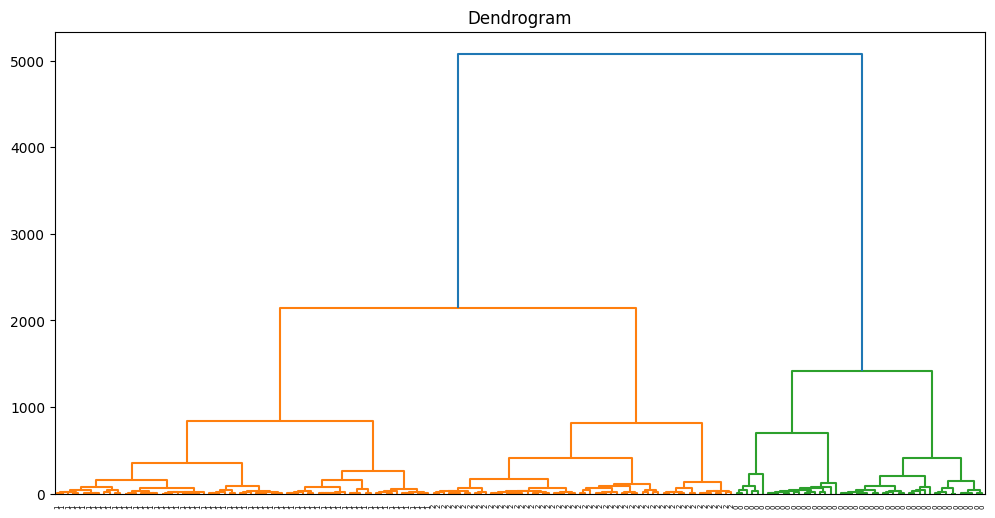

In [238]:
from sklearn.datasets import load_wine
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the Wine dataset
wine = load_wine()
data = wine.data

# Perform Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(data)

# Get the cluster labels
labels = agg_clustering.labels_

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(data, labels)
print(f"Davies-Bouldin Index: {db_index}")

# Create a linkage matrix for dendrogram
linkage_matrix = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, orientation="top", labels=labels, distance_sort='descending')
plt.title('Dendrogram')
plt.show()

#### Implementation 2
The code performs Gaussian Mixture Model (GMM) clustering on a synthetic dataset generated using scikit-learn’s make_blobs function. It also calculates the Davies-Bouldin Index (DBI) to evaluate the clustering results and plots a scatter plot to visualize the clustering results.

Davies-Bouldin Index: 0.21231599538998416


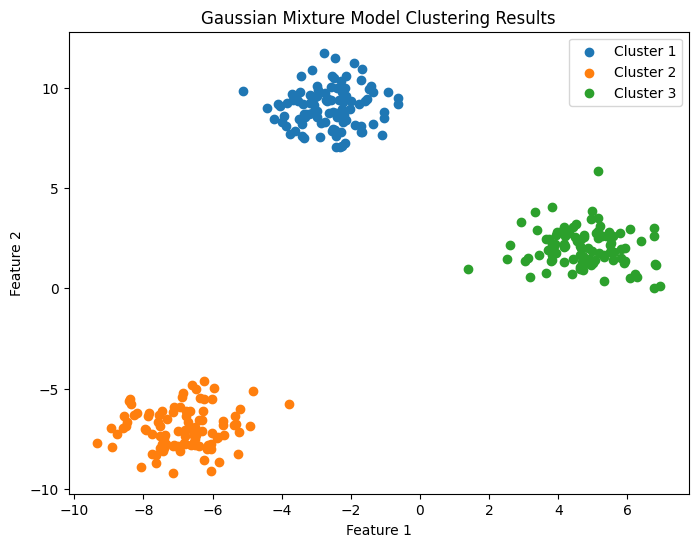

In [239]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Generate a synthetic dataset with blobs
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

data, ground_truth_labels = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Perform Gaussian Mixture Model (GMM) clustering
gmm = GaussianMixture(n_components=n_clusters, random_state=random_state)
gmm.fit(data)

# Get the cluster labels
labels = gmm.predict(data)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(data, labels)
print(f"Davies-Bouldin Index: {db_index}")

# Plot the clustering results in a scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot the data points with different colors for each cluster
for i in range(n_clusters):
	cluster_data = data[labels == i]
	plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i + 1}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Mixture Model Clustering Results')
plt.legend()
plt.show()


#### Question
Test your understanding of clustering evaluation metrics by identifying the key parameter assessed by the Davies-Bouldin Index for gauging the quality of clustering models.

<div style="display:none" id="q_non_spherical_clusters">W3sicXVlc3Rpb24iOiAiV2hhdCBkb2VzIHRoZSBEYXZpZXMtQm91bGRpbiBJbmRleCBtZWFzdXJlIHdoZW4gZXZhbHVhdGluZyBjbHVzdGVyaW5nIG1vZGVscz8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIlRoZSBhdmVyYWdlIGRpc3RhbmNlIGJldHdlZW4gZGF0YSBwb2ludHMgaW4gZWFjaCBjbHVzdGVyLiIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QuIFRoaXMgbWVhc3VyZSBmb2N1c2VzIG9uIGEgZGlmZmVyZW50IGFzcGVjdCBvZiBjbHVzdGVyaW5nIHF1YWxpdHkuIn0sIHsiYW5zd2VyIjogIlRoZSByYXRpbyBiZXR3ZWVuIGludGVyLWNsdXN0ZXIgYW5kIGludHJhLWNsdXN0ZXIgZGlzdGFuY2VzLiIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QhIFRoZSBEYXZpZXMtQm91bGRpbiBJbmRleCB1c2VzIHRoaXMgcmF0aW8gdG8gYXNzZXNzIGNsdXN0ZXJpbmcgcXVhbGl0eS4ifSwgeyJhbnN3ZXIiOiAiVGhlIHRvdGFsIG51bWJlciBvZiBjbHVzdGVycyBpbiB0aGUgZGF0YXNldC4iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBUaGUgRGF2aWVzLUJvdWxkaW4gSW5kZXggZG9lcyBub3QgZGlyZWN0bHkgbWVhc3VyZSB0aGUgdG90YWwgbnVtYmVyIG9mIGNsdXN0ZXJzLiJ9LCB7ImFuc3dlciI6ICJUaGUgZGVuc2l0eSBvZiBkYXRhIHBvaW50cyBpbiBlYWNoIGNsdXN0ZXIuIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gVGhpcyBhc3BlY3QgaXMgbm90IHRoZSBwcmltYXJ5IGZvY3VzIG9mIHRoZSBEYXZpZXMtQm91bGRpbiBJbmRleC4ifV19XQ==</div>

In [240]:
display_quiz("#q_non_spherical_clusters")

<IPython.core.display.Javascript object>

### Adjusted Rand Index (ARI)

The Adjusted Rand Index (ARI) is a measure used in clustering and classification tasks to assess the similarity between two data partitions, taking into account chance agreement. It is an adjustment of the Rand Index and provides a normalized score that considers random clustering.

The formula for Adjusted Rand Index is expressed as follows:


$$
ARI = \frac{\text{RI} - \text{Expected}}{\text{Max} - \text{Expected}}
$$



```{admonition} Explanation!
:class: tip, dropdown
$$
\begin{aligned}
\text{RI} & = \text{Rand Index} \\
\text{Expected} & = \text{Expected Rand Index under independence} \\
\text{Max} & = \text{Maximum possible Rand Index}
\end{aligned}
$$
```



The Rand Index is calculated using the formula:

$$
RI = \frac{a + b}{a + b + c + d}
$$

```{admonition} Explanation!
:class: tip, dropdown
$$
\begin{aligned}
a & = \text{Number of pairs of elements that are in the same cluster in both partitions} \\
b & = \text{Number of pairs of elements that are in different clusters in both partitions} \\
c & = \text{Number of pairs of elements that are in the same cluster in the first partition and in different clusters in the second partition} \\
d & = \text{Number of pairs of elements that are in different clusters in the first partition and in the same cluster in the second partition}
\end{aligned}
$$
```

#### Example: Digits Dataset

Dataset looks like:

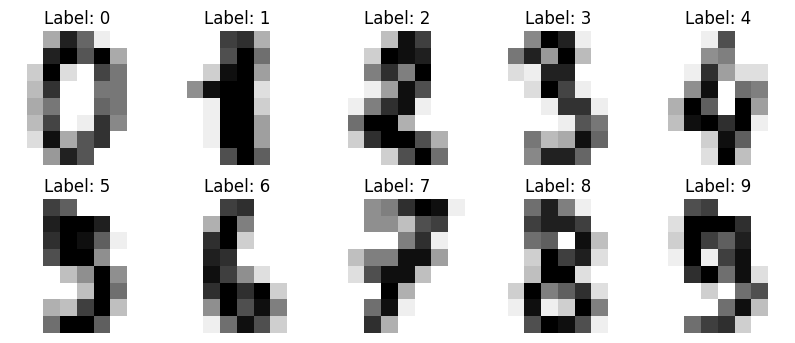

In [241]:
import matplotlib.pyplot as plt
from sklearn import datasets
# Load the digits dataset
digits = datasets.load_digits()

# Display a few images and their labels
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i in range(10):  # Corrected loop range
    axes[i // 5, i % 5].imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    axes[i // 5, i % 5].set_title(f"Label: {digits.target[i]}")
    axes[i // 5, i % 5].axis('off')

plt.show()


Assume we are using KMeans clustering algorithm with 10 clusters (digits 0-9):

```python
kmeans = KMeans(n_clusters=10, random_state=42)
y_pred = kmeans.fit_predict(X)
```

Calculate Adjusted Rand Index:

```python
ari_score = adjusted_rand_score(y_true, y_pred)
```

In [242]:
from bokeh.plotting import figure, show, output_notebook
output_notebook()

Loading BokehJS ...

In [243]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category10_10
from bokeh.io import output_notebook

# Load the digits dataset
digits = datasets.load_digits()
data = digits.data
target = digits.target

# Reduce dimensionality for visualization (using PCA)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Perform K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(data)

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(target, clusters)
print(f"Adjusted Rand Index (ARI): {ari}")

# Create a Bokeh figure
output_notebook()
p = figure(title=f"Interactive Clustering of Digits Dataset\nARI: {ari:.4f}", width=800, height=600)

# Map cluster labels to colors
colors = [Category10_10[i] for i in clusters]
source = ColumnDataSource(data=dict(x=data_pca[:, 0], y=data_pca[:, 1], color=colors, digit=target, cluster=clusters))

# Add glyphs to the plot
scatter = p.scatter(x='x', y='y', size=8, color='color', legend_field='digit', source=source, fill_alpha=0.6, line_alpha=0.6)

# Customize plot aesthetics
p.title.text_font_size = '16pt'
p.legend.title = 'Digit'
p.legend.label_text_font_size = '10pt'
p.xaxis.axis_label = 'Principal Component 1'
p.yaxis.axis_label = 'Principal Component 2'

# Add tooltips with images
hover = HoverTool()
hover.tooltips = [("Digit", "@digit"), ("Cluster", "@cluster")]
hover.renderers = [scatter]
p.add_tools(hover)

# Show the interactive plot
show(p)


Adjusted Rand Index (ARI): 0.6669121092859385


Loading BokehJS ...

### Calinski-Harabasz index

The **Calinski-Harabasz index** (also known as the **Variance Ratio Criterion**) is calculated as a ratio of the sum of inter-cluster dispersion and the sum of intra-cluster dispersion for all clusters (where the dispersion is the sum of squared distances).


The **Calinski-Harabasz index** (CH) is a way to measure how well a K-Means clustering algorithm divides data into clusters. It helps assess the effectiveness of the algorithm in creating meaningful groups when a specific number of clusters is used.

#### How do you interpret Calinski-Harabasz index?

A high **Calinski-Harabasz index** (CH) indicates improved clustering because it signifies that data points within each cluster are closely packed (denser), while the clusters themselves are well-separated from one another.

In the upcoming section, we'll delve into a detailed explanation of how to calculate the CH, complete with a few illustrative examples.

To proceed with this tutorial, make sure you have the following Python libraries installed: `scikit-learn` and `matplotlib`.

####Calinski-Harabasz Index Explained

In this section, we will break down each calculation step and offer insightful examples to enhance your comprehension of the formulas.

Initially, we calculate the inter-cluster dispersion, also known as the between-group sum of squares (BGSS).

In the CH context, inter-cluster dispersion gauges the weighted sum of squared distances between the centroids of clusters and the centroid of the entire dataset (barycenter).

The calculation for the between-group sum of squares is as follows:

$$\text{BGSS} = \sum_{k=1}^{K}  n_k \cdot \|\mathbf{C}_k - \mathbf{C}\|^2$$


Here are the key terms used in the formula:

- **n<sub>k</sub>**: the number of observations in cluster **k**.
- **C<sub>k</sub>**: the centroid of cluster **k**.
- **C**: the centroid of the dataset (barycenter).
- **K**: the number of clusters.

<div style="display:none" id="q_bgss">W3sicXVlc3Rpb24iOiAiV2hhdCBkb2VzIEJHU1Mgc3RhbmQgZm9yIGluIHRoZSBjb250ZXh0IG9mIHRoZSBDYWxpbnNraS1IYXJhYmFzeiBJbmRleD8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIkJldHdlZW4gR3JvdXAgU3RhbmRhcmQgU3VtIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdCEifSwgeyJhbnN3ZXIiOiAiQmV0d2VlbiBHcm91cCBTdW0gb2YgU3F1YXJlcyIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QhIn0sIHsiYW5zd2VyIjogIkJhcnljZW50ZXIgR3JvdXAgU3F1YXJlZCBTdW0iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0ISJ9LCB7ImFuc3dlciI6ICJCYWxhbmNlZCBHcm91cCBTdW0iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0ISJ9XX1d</div>

<div style="display:none" id="q_inter_cluster_measure">W3sicXVlc3Rpb24iOiAiV2hhdCBkb2VzIHRoZSBpbnRlci1jbHVzdGVyIGRpc3BlcnNpb24gbWVhc3VyZSBpbiB0aGUgQ2FsaW5za2ktSGFyYWJhc3ogSW5kZXg/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICJXaXRoaW4gR3JvdXAgU3VtIG9mIFNxdWFyZXMiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0ISJ9LCB7ImFuc3dlciI6ICJXZWlnaHRlZCBzdW0gb2Ygc3F1YXJlZCBkaXN0YW5jZXMgYmV0d2VlbiBjZW50cm9pZHMiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0ISJ9LCB7ImFuc3dlciI6ICJUb3RhbCBudW1iZXIgb2Ygb2JzZXJ2YXRpb25zIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdCEifSwgeyJhbnN3ZXIiOiAiVG90YWwgc3VtIG9mIHNxdWFyZXMiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0ISJ9XX1d</div>

<div style="display:none" id="q_nk">W3sicXVlc3Rpb24iOiAiV2hhdCBkb2VzICduaycgcmVwcmVzZW50IGluIHRoZSBCR1NTIGZvcm11bGE/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICJUb3RhbCBudW1iZXIgb2YgY2x1c3RlcnMiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0ISJ9LCB7ImFuc3dlciI6ICJUaGUgbnVtYmVyIG9mIG9ic2VydmF0aW9ucyBpbiBjbHVzdGVyIGsiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0ISJ9LCB7ImFuc3dlciI6ICJCYXJ5Y2VudGVyIG9mIHRoZSBkYXRhc2V0IiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdCEifSwgeyJhbnN3ZXIiOiAiQmV0d2VlbiBHcm91cCBTdW0gb2YgU3F1YXJlcyIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QhIn1dfV0=</div>

In [244]:
from jupyterquiz import display_quiz

display_quiz("#q_bgss")
display_quiz("#q_inter_cluster_measure")
display_quiz("#q_nk")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Next, the second step involves calculating the intra-cluster dispersion, or the within-group sum of squares (WGSS).

In the CH context, intra-cluster dispersion assesses the sum of squared distances between each observation and the centroid of its corresponding cluster.

For each cluster **k** we will compute the **WGSS<sub>k</sub>** as:

$$\text{WGSS}_k = \sum_{k=1}^{{n_k}}  \|\mathbf{X}_ik - \mathbf{C}_k\|^2$$


Here are the key terms used in the formula:

- **n<sub>k</sub>**: the number of observations in cluster **k**.
- **X<sub>ik</sub>**: the i-th observation of cluster **k**.
- **C<sub>k</sub>**:  the centroid of cluster **k**.

And then sum all individual within group sums of squares:
$$\text{WGSS} = \sum_{k=1}^{K} \mathbf{WGSS}_k$$


Here are the key terms used in the formula:

- **WGSS<sub>k</sub>**: the within group sum of squares of cluster **k**.
- **K**:   the number of clusters.

#### Calculate Calinski-Harabasz Index

The Calinski-Harabasz index is determined by summing the inter-cluster dispersion and the intra-cluster dispersion across all clusters.

The calculation for the Calinski-Harabasz index is as follows:

$$\text{WGSS} = \frac{ \frac{BGSS}{K-1} }{ \frac{WGSS}{N-K} } = \frac{BGSS}{WGSS} \times \frac{N-K}{K-1}$$


Here are the key terms used in the formula:

- **BGSS**:   between-group sum of squares (between-group dispersion).
- **WGSS**:   within-group sum of squares (within-group dispersion).
- **N**:   total number of observations.
- **K**:  total number of clusters.

From the above formula, we can conclude that the large values of Calinski-Harabasz index represent better clustering.

#### Calinski-Harabasz Index Example in Python

In this part, we'll walk through an example of computing the Calinski-Harabasz index for a K-Means clustering algorithm in Python.

To begin, import the necessary dependencies:

In [245]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

Feel free to utilize any dataset with the provided code. For simplicity, we'll use the built-in Iris dataset, focusing specifically on the first two features: "sepal width" and "sepal length":

In [246]:
iris = load_iris()
X = iris.data[:, :2]

We'll begin by setting the target for K-Means to have 3 clusters:

In [247]:
kmeans = KMeans(n_clusters=3, random_state=30)
labels = kmeans.fit_predict(X)


And check the Calinski-Harabasz index for the above results:

In [248]:
ch_index = calinski_harabasz_score(X, labels)

print(ch_index)


185.33266845949427


You should get the resulting score: **185.33266845949427** or approximately (**185.33**).

To put in perspective how the clusters look , let’s visualize them:

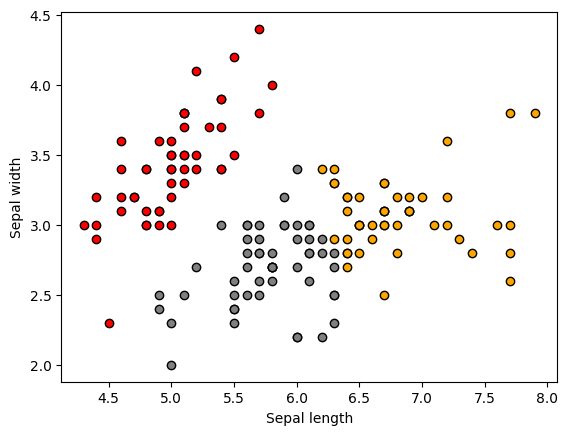

In [249]:
unique_labels = list(set(labels))
colors = ['red', 'orange', 'grey']

for i in unique_labels:
    filtered_label = X[labels == i]
    plt.scatter(filtered_label[:,0],
                filtered_label[:,1],
                color = colors[i],
                edgecolor='k')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

We should see the following original 3 clusters (**above**)

Given that we computed the CH index for 3 clusters and the original data has 3 labels, we expect the CH index to be highest for 3 clusters compared to other cluster numbers.

Now, let's compute the CH index for a range of cluster numbers and identify the highest values:

In [250]:
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(X)
    db_index = calinski_harabasz_score(X, labels)
    results.update({i: db_index})



and visualize it:

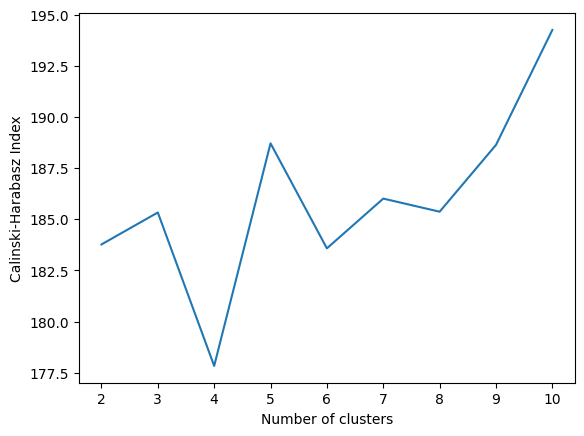

In [251]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

An interesting observation emerges as 5 clusters and 10 clusters yield a higher Calinski-Harabasz index value compared to 3 clusters, despite the actual number of labels in the data being 3.

It's worth noting that while we can obtain higher CH index values for cluster numbers other than 3, the index values remain within a very close range, roughly between 175 and 200.